# 300_analysis_RQ2

## Purpose
This notebook will be continuing analysis of our second RQ:

- "How does a founders education impact the amount of funding received by a startup"

We will investigate a founders education in terms of two aspects, the founders Highest Degree achieved and the institution that they attended. Once we have analysed these two aspects in enough detail in relation to our success metric, we will be able to conclude this RQ. 

This notebook focuses on the following analysis points:
- Gender % of founders
- Does this gender % change when looking at Highest Degree acheived by a founder?
- Looking at the range of funding totals in data
- Brief analysis of funding rounds of a startup

## Datasets
* _Input_: 200_analysis_RQ2.pkl
* _Output_: 300_analysis_RQ2.pkl

In [1]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from matplotlib import cm
import seaborn as sns
import networkx as nx
pd.set_option('display.max_columns', None)
module_path = os.path.abspath(os.path.join('../../data/..'))
if module_path not in sys.path:
    sys.path.append(module_path)
%matplotlib inline

In [2]:
sns.set_style("whitegrid")
sns.set_style("ticks")
sns.set_palette("muted")
sns.set_context("poster")

# Text, lines, and markers...
plt.rcParams['text.color'] = 'k'
plt.rcParams['axes.labelcolor'] = 'k'
plt.rcParams['axes.titlesize'] = 28
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.labelsize'] = 28
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.grid'] = True
plt.rcParams['xtick.labelsize'] = 22
plt.rcParams['ytick.labelsize'] = 22
plt.rcParams['lines.markersize'] = 15
plt.rcParams['lines.markeredgewidth'] = 1
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['legend.fontsize'] = 22
plt.rcParams['patch.force_edgecolor'] = True

## Importing dataset 2

This dataset contains information about each founder like their education and also details about the startup they founded. As mentioned in previous notebooks, the reason there are multiple person instances in our dataset is because: 
- A duplicate person instance if they have founded multiple companies.
- A duplicate person instance if they have changed positions in the same company.
- A duplicate person instance if they have attain another degree/change institution while at the same company.

However, we do not see the need of merging these rows together as they would store too much information. Not only this, having the rows seperated makes it easier for our analysis of this RQ when looking at the Highest Degree and Institutions attended by the founders.

In [3]:
founders_df_raw = pd.read_pickle('../../data/analysis/200_analysis_RQ2.pkl')
founders_df_raw.shape

(44711, 55)

## Looking at Gender % of founders in our dataframe

We want to look at the gender percentage of founders in our dataframe. Specifically we want to see if this gender percentage changes in relation to the highest degree achieved. When doing this analysis, we want to ensure that there are no founders who have a null gender value. 

We will begin our gender analysis of these founders looking at the Highest Degree attained by them.

**Why group by person_uuid and org_uuid?** 

This is an important question in relation to our dataset. We do not want to only group founders by their unique person identifier, as this will mean that founders of multiple startups will be classified as one founder. We instead want them to be counted each time they found a company.

In [4]:
# filtering founders with null gender and then grouping by person_uuid and org_uuid
# aggergating gender and Highest Degree as we will use this for our analysis
founders_gender_df = founders_df_raw[~founders_df_raw.gender.isnull()].groupby(['person_uuid','org_uuid']).agg({'gender':'first','Highest_Degree':'first'})
founders_gender_df.shape

(30047, 2)

We have previously seen from our preparation that a lot of this data has been user inputted. So first of all, we will have a look at the different types of values in the gender field.

In [5]:
list(founders_gender_df.gender.unique())

['male', 'female', 'not_provided']

**Thankfully** we only have three unique gender values. We will next look at the different counts of these values in our dataframe.

In [6]:
founders_gender_df['gender'].value_counts()

male            26089
female           3852
not_provided      106
Name: gender, dtype: int64

Once glance at these value counts and it can be seen that it is largely dominated by males. We are not interested in having the 'not_provided' value for this analysis so the next step is masking the dataframe so it is not included. 100 founder instances will not effect our accuracy hugely.

In [7]:
# masking the dataframe so we are only dealing with 'male' and 'female' gender values in our analysis
founders_gender_df = founders_gender_df[founders_gender_df['gender']!='not_provided']
founders_gender_df.shape

(29941, 2)

**Looking at the value counts again...**

In [8]:
founders_gender_df['gender'].value_counts()

male      26089
female     3852
Name: gender, dtype: int64

**Plotting these values results in...**

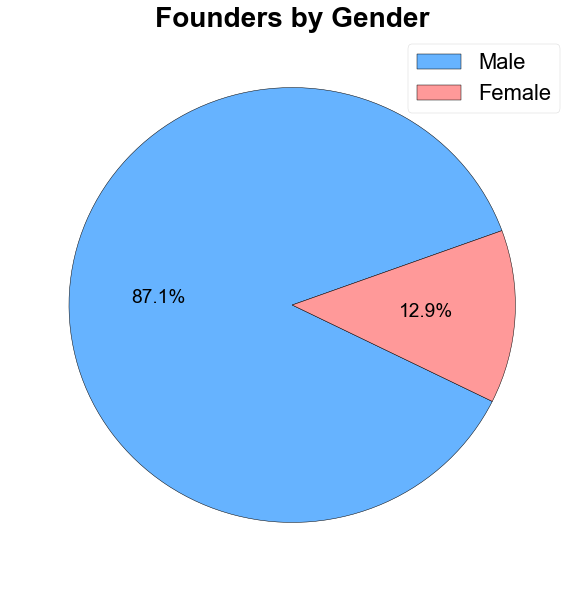

In [9]:
plt.figure(figsize=(10,10))
counts= founders_gender_df['gender'].value_counts()
colors = ['#66b3ff','#ff9999']
plt.pie(counts, colors = colors, autopct='%1.1f%%',startangle=20)
plt.legend(("Male","Female"),frameon=True, loc='best')
plt.title("Founders by Gender")
plt.show()

This pie chart effectively shows how much Males dominate our dataset. There are almost 7 times as many males as there are females. This is a huge difference. This is a very interesting point of analysis that potentially can be explored in future work of this topic.

## Analysis of Gender % of founders for Bachelors, Masters and PhD degrees

### 1. Bachelors

We first want to look at the gender percentage split of a founder who has achieved a Bachelors as a Highest Degree.

In [10]:
# We mask the dataframe we created from previous step of analysis to only include founders with Highest Degree = Bachelors
bachelors_founders_df = founders_gender_df[founders_gender_df['Highest_Degree']=='Bachelors']
bachelors_founders_df.head(5) 

gender  \
person_uuid                          org_uuid                                       
000497ac-d3f9-7969-6c8b-b4050c8efc04 14658850-0cc9-15f8-62f3-a8c532ea6c61    male   
00065f25-101a-bfe2-d79c-a172af342c70 6663f9d3-e6ab-348f-66c7-cafc00ce01a8    male   
                                     a1102c6c-1bc4-b6aa-c5f2-6c34bd4b2370    male   
000792fb-3022-cac3-eea5-a93a49150727 7b224a36-b7b4-d02f-bf76-b4ac9ba085ca    male   
00082be1-4c28-c41f-6147-92d0e12629c8 000ad7a8-b868-f301-5f00-2a3361288fc9  female   

                                                                          Highest_Degree  
person_uuid                          org_uuid                                             
000497ac-d3f9-7969-6c8b-b4050c8efc04 14658850-0cc9-15f8-62f3-a8c532ea6c61      Bachelors  
00065f25-101a-bfe2-d79c-a172af342c70 6663f9d3-e6ab-348f-66c7-cafc00ce01a8      Bachelors  
                                     a1102c6c-1bc4-b6aa-c5f2-6c34bd4b2370      Bachelors  
000792fb-3022-cac3-eea5-a93a49150727 7b224a36-b7b4-d02f-bf76-b4ac9ba085ca      Bachelors  
00082be1-4c28-c41f-6147-92d0e12629c8 000ad7a8-b868-f301-5f00-2a3361288fc9      Bachelors

In [11]:
bachelors_founders_df.shape

(13129, 2)

**Looking at the value counts...**

In [12]:
bachelors_founders_df['gender'].value_counts()

male      11457
female     1672
Name: gender, dtype: int64

**Plotting these values results in...**

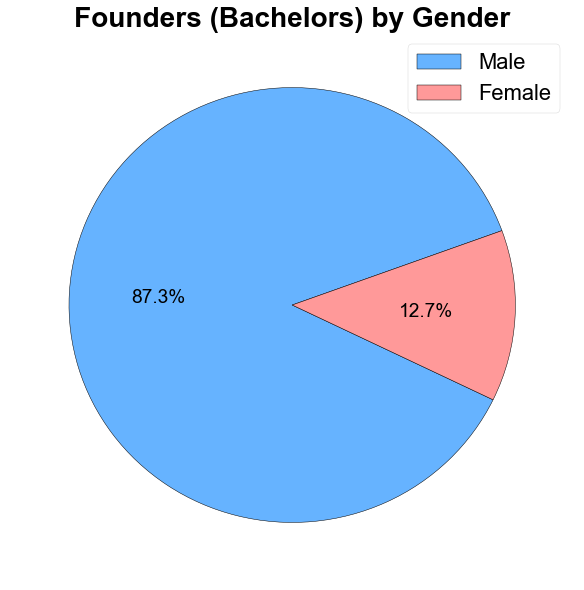

In [13]:
plt.figure(figsize=(10,10))
counts= bachelors_founders_df['gender'].value_counts()
colors = ['#66b3ff','#ff9999']
plt.pie(counts, colors = colors, autopct='%1.1f%%',startangle=20)
plt.legend(("Male","Female"),frameon=True, loc='best')
plt.title("Founders (Bachelors) by Gender")
plt.show()

### 2. Masters

We now want to look at the gender percentage split of a founder who has achieved a Masters as a Highest Degree.

In [14]:
masters_founders_df = founders_gender_df[founders_gender_df['Highest_Degree']=='Masters']
masters_founders_df.head(5)

gender  \
person_uuid                          org_uuid                                       
000575b8-eac0-66b1-2a16-03c08c2b9f66 d2de0c01-397d-b4f1-8575-9b5e74e6b6b8    male   
0005da7e-2311-9002-7756-ed2f2734e057 2aec3826-0f75-1f21-326a-5dbca9d5ff15    male   
                                     bd4c4326-ef34-d5d9-b689-0c0b0a6ba03c    male   
00104afd-01f7-d1f0-90af-fff7af4a39ad a8708f75-09ed-35f3-b346-272131dc977f    male   
00163642-b6d8-2548-f825-a3e814a49a7f b6959be1-c3a2-4147-25ef-4b100615c7fe  female   

                                                                          Highest_Degree  
person_uuid                          org_uuid                                             
000575b8-eac0-66b1-2a16-03c08c2b9f66 d2de0c01-397d-b4f1-8575-9b5e74e6b6b8        Masters  
0005da7e-2311-9002-7756-ed2f2734e057 2aec3826-0f75-1f21-326a-5dbca9d5ff15        Masters  
                                     bd4c4326-ef34-d5d9-b689-0c0b0a6ba03c        Masters  
00104afd-01f7-d1f0-90af-fff7af4a39ad a8708f75-09ed-35f3-b346-272131dc977f        Masters  
00163642-b6d8-2548-f825-a3e814a49a7f b6959be1-c3a2-4147-25ef-4b100615c7fe        Masters

In [15]:
masters_founders_df.shape

(12244, 2)

**Looking at the value counts...**

In [16]:
masters_founders_df['gender'].value_counts() 

male      10618
female     1626
Name: gender, dtype: int64

**Plotting these values results in...**

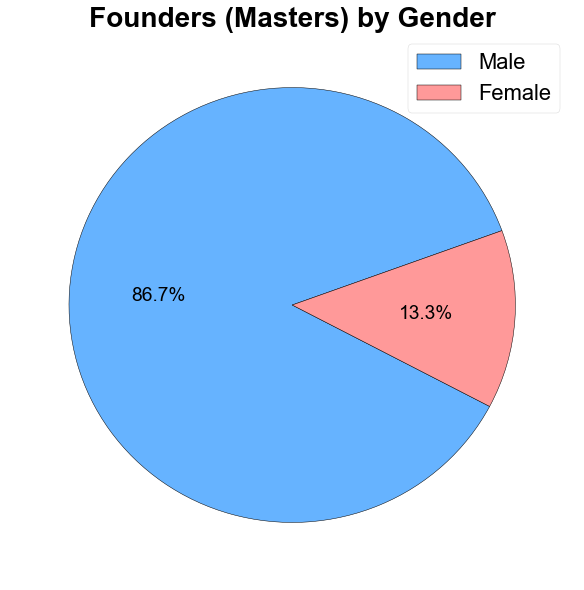

In [17]:
plt.figure(figsize=(10,10))
counts= masters_founders_df['gender'].value_counts()
colors = ['#66b3ff','#ff9999']
plt.pie(counts, colors = colors, autopct='%1.1f%%',startangle=20)
plt.legend(("Male","Female"),frameon=True, loc='best')
plt.title("Founders (Masters) by Gender")
plt.show()

### 2. PhD

We now want to look at the gender percentage split of a founder who has achieved a PhD as a Highest Degree.

In [18]:
phd_founders_df = founders_gender_df[founders_gender_df['Highest_Degree']=='PhD']
phd_founders_df.head(5) 

gender  \
person_uuid                          org_uuid                                       
00026df9-9254-269d-40b1-549e9529550d d2d0cb83-b874-c5d7-c7f7-fb77613cc95b    male   
0009f5cb-b369-880a-9638-f4eece52f418 0c430e2d-0b76-258c-1d5e-b973cc3cd827    male   
                                     d4180d8b-c189-c227-8e7e-e274133023a4    male   
00184b35-b9aa-f6c2-898e-0a1a6e0ee1e5 a3826f14-4c4b-eb30-bdd3-d8c516612ace    male   
001e6e02-fdf2-ca2f-f978-12b152a8d669 22a7b18e-6eb9-f37c-2723-fb8d3f3d5011  female   

                                                                          Highest_Degree  
person_uuid                          org_uuid                                             
00026df9-9254-269d-40b1-549e9529550d d2d0cb83-b874-c5d7-c7f7-fb77613cc95b            PhD  
0009f5cb-b369-880a-9638-f4eece52f418 0c430e2d-0b76-258c-1d5e-b973cc3cd827            PhD  
                                     d4180d8b-c189-c227-8e7e-e274133023a4            PhD  
00184b35-b9aa-f6c2-898e-0a1a6e0ee1e5 a3826f14-4c4b-eb30-bdd3-d8c516612ace            PhD  
001e6e02-fdf2-ca2f-f978-12b152a8d669 22a7b18e-6eb9-f37c-2723-fb8d3f3d5011            PhD

In [19]:
phd_founders_df.shape

(3350, 2)

**Looking at the value counts...**

In [20]:
phd_founders_df['gender'].value_counts() 

male      2953
female     397
Name: gender, dtype: int64

**Plotting these values results in...**

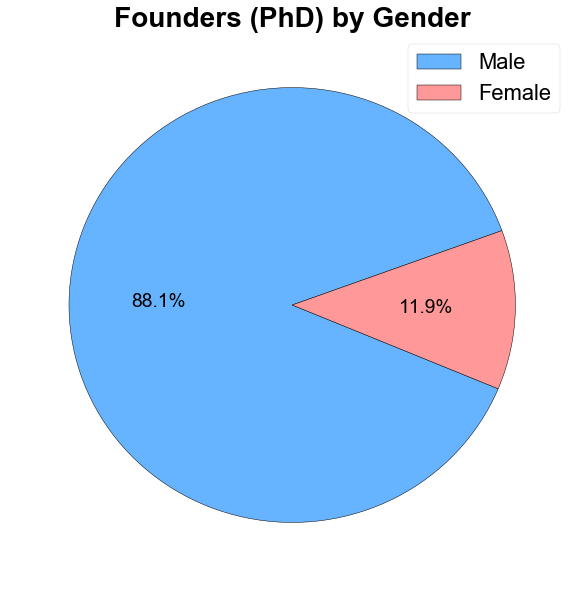

In [21]:
plt.figure(figsize=(10,10))
counts= phd_founders_df['gender'].value_counts()
colors = ['#66b3ff','#ff9999']
plt.pie(counts, colors = colors, autopct='%1.1f%%',startangle=20)
plt.legend(("Male","Female"),frameon=True, loc='best')
plt.title("Founders (PhD) by Gender")
plt.show()

**In Conclusion...**

We can see that even across the different degree types, males continue to dominate the overall percentage. One last visualisation that shows this effectively is shown below. We expected to see at least one significant difference when looking at this gender percentage for each degree type. However, this was not the case as the percentage of Males/Females varied by 1% maximum.

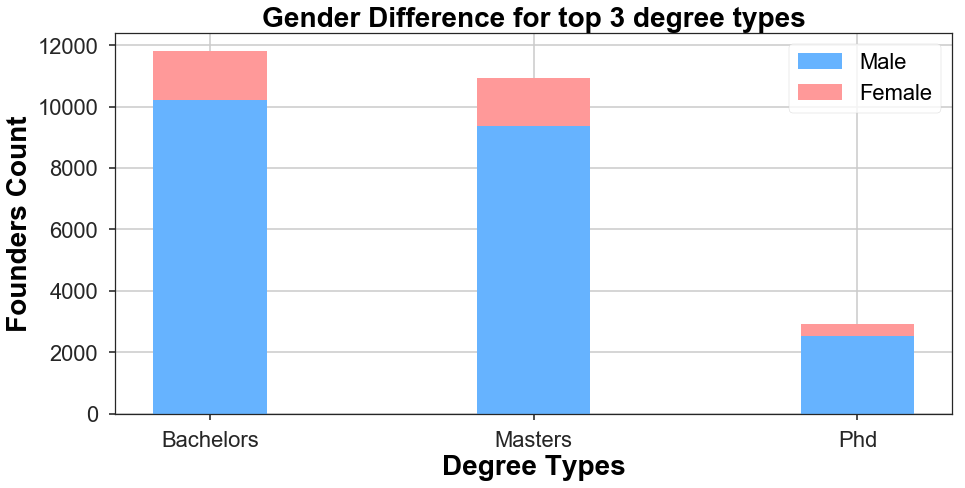

In [22]:
plt.figure(figsize=(15,7))

# The first values in each of these arrays are for Bachelors, 2nd = Masters, 3rd = PhD
# We entered these from the value_count series above.
male_vals = np.array((10221,9378,2539))
female_vals = np.array((1584,1538,379))

ind = np.arange(3)    
width = 0.35    

p1 = plt.bar(ind, male_vals, width, color='#66b3ff', edgecolor="none")
p2 = plt.bar(ind, female_vals, width,  bottom=male_vals, color='#ff9999', edgecolor="none")

plt.ylabel('Founders Count')
plt.title('Gender Difference for top 3 degree types')
plt.xticks(ind, ('Bachelors', 'Masters', 'Phd'))
plt.xlabel('Degree Types')
plt.legend((p1[0], p2[0]), ('Male', 'Female'), frameon=True)

plt.show()

## Looking at Mean Funding of Founders more in depth

In our previous analysis notebook for this RQ, we looked at the mean funding of a founder for all the degree types. However since then, we have focused on the 3 most popular degree types: **Bachelors, Masters and PhD**. When doing this analysis previously, we had not considered that the range of our funding total values were very large.

**First Step of Anlaysis...**

Investigating whether these funding total ranges are very large for the institutions.

In [23]:
# This function is used to return the range value and mean value of funding for an inputted institution
def college_info_vals(df, college):
    # founders who have not attended institution inputted into function are filtered
    df_masked = df[(df['institution_uuid']==college)]
    
    # founders grouped again based on person identifier and org identifier. Funding total aggergated. as_index false as
    # we want to group them again and it simplifies this
    df_grouped = df_masked.groupby(['person_uuid','org_uuid'],as_index=False).agg({'funding_total_usd':'first'})
    
    # finding the max, min, mean and range value by grouping the organisations, using their first funding total instance
    # as it is same for all founders, then finding respective max, min etc.
    max_val = df_grouped.groupby('org_uuid').agg({'funding_total_usd':'first'}).funding_total_usd.max()
    min_val = df_grouped.groupby('org_uuid').agg({'funding_total_usd':'first'}).funding_total_usd.min()
    mean_val = df_grouped.groupby('org_uuid').agg({'funding_total_usd':'first'}).funding_total_usd.mean()
    range_val = max_val-min_val
    
    # range and mean value of institution returned
    return range_val, mean_val


In [24]:
# Top institutions defined
top_institutions = ['Stanford','Harvard','MIT','UPenn','Berkeley']
columns=['College','Range_Value','Mean_Value']
output = pd.DataFrame(columns=columns)

# going through top institutions and calling the function above
for val in top_institutions:
    rangev,meanv = college_info_vals(founders_df_raw, val)
    # resulting string from function appended to list called output
    output = output.append(pd.Series([val,rangev,meanv], index=columns), ignore_index=True)
output

,College,Range_Value,Mean_Value
0,Stanford,1.254846e+10,7.181499e+07
1,Harvard,4.398081e+09,5.580232e+07
2,MIT,4.112495e+09,4.990949e+07
3,UPenn,8.343995e+09,5.052640e+07
4,Berkeley,1.254846e+10,6.723381e+07


We can see from the outputted dataframe above that the **range** of funding is **very large** for each institution as we expected. The mean values are therefore not as accurate as we want them to be. 

At this point in the analysis, we feel that splitting the funding total achieved by founders into three main categories will allow us to get a **greater insight** into our data. **Evenly split** funding intervals will be necessary in order to achieve this.

The 3 funding intervals we chose:
- **Interval one**: A founder of a company who has attained funding less than or equal to 1,000,000 USD
- **Interval two**: A founder of a company who has attained funding between 1,000,000 - 10,000,000 USD
- **Interval three**: A founder of a company who has attained funding greater than 10,000,000 USD

## Institution analysis in relation to the three funding intervals

The first point of analysis, using the funding intervals, will be looking at the different counts of founders attending these top institutions.

The following block of code defines the boolean conditions that we will use when we want to filter the dataframe using a mask:

In [25]:
# Funding interval boolean conditions for our dataframe
Interval_1 = (founders_df_raw.funding_total_usd <= 1000000.0)
Interval_2 = ((founders_df_raw.funding_total_usd > 1000000.0) & (founders_df_raw.funding_total_usd <= 10000000.0))
Interval_3 = (founders_df_raw.funding_total_usd > 10000000.0)

### 1. Interval one: Less than or equal to 1Million USD achieved

To do this analysis we will be again grouping the founders based on the person_uuid, their org_uuid and the institution_uuid. Then we will aggergate the first funding total instance of the founder. The resulting dataframe is what we will use for our analysis.

In [26]:
# We use the boolean condition for the first interval before grouping by the person id, organisation id and institution id
interval1_grouped = founders_df_raw[Interval_1].groupby(['person_uuid','org_uuid','institution_uuid'],as_index=False).agg({'funding_total_usd':'first'})
interval1_grouped.head(5)

,person_uuid,org_uuid,institution_uuid,funding_total_usd
0,000575b8-eac0-66b1-2a16-03c08c2b9f66,d2de0c01-397d-b4f1-8575-9b5e74e6b6b8,1eab62d2-15d9-0db7-930f-2aa77d4688e1,30000.0
1,00065f25-101a-bfe2-d79c-a172af342c70,6663f9d3-e6ab-348f-66c7-cafc00ce01a8,1fe3a91c-1f94-fecb-3774-b45618c9e4fa,50000.0
2,00086acf-adf2-b9cc-e600-442bfba4412d,fcf35538-c297-85aa-4fd8-230d4a64125a,6d8b0da2-7608-e923-434b-d1dcafda699b,20000.0
3,000900e0-de66-f99d-38cb-def9d7b8a75b,85767bb9-1b17-9997-06a2-56525738e398,6d7683c1-e3cf-9c90-d3a8-03e4be9ccb0c,100000.0
4,00091a93-d3ec-d264-fec2-a8b162ec6646,3f032059-7df2-dd9c-698b-dcd4d05d2b04,59229786-b811-b948-2cbe-104df15d5e50,20000.0


In [27]:
interval1_grouped.shape

(11998, 4)

**Looking at the most popular institutions...**

In [28]:
interval1_grouped.institution_uuid.value_counts().head(5)

Stanford    243
Harvard     190
UPenn       156
Berkeley    155
MIT         146
Name: institution_uuid, dtype: int64

**Next Step of Analysis...**

It would be interesting to see how many unique institutions Interval 1 Founders attended in total 

In [29]:
# Value is saved in variable for analysis later on
uniq_inst_int1 = interval1_grouped.institution_uuid.unique().size
uniq_inst_int1

2798

In [30]:
interval1_grouped.groupby('institution_uuid')['funding_total_usd'].sum().sort_values(ascending=False).head(5)

institution_uuid
Stanford    99710622.0
Harvard     73306594.0
UPenn       67013276.0
Berkeley    53066635.0
MIT         51908694.0
Name: funding_total_usd, dtype: float64

### 2. Interval two: 1Million USD - 10Million USD achieved

To do this analysis we will be again grouping the founders based on the person_uuid, their org_uuid and the institution_uuid. Then we will aggergate the first funding total instance of the founder. The resulting dataframe is what we will use for our analysis.

In [31]:
interval2_grouped = founders_df_raw[Interval_2].groupby(['person_uuid','org_uuid','institution_uuid'],as_index=False).agg({'funding_total_usd':'first'})
interval2_grouped.head(5)

,person_uuid,org_uuid,institution_uuid,funding_total_usd
0,00026df9-9254-269d-40b1-549e9529550d,d2d0cb83-b874-c5d7-c7f7-fb77613cc95b,3e893a4c-f191-b42c-5dab-4785e07d3c75,1016992.0
1,00026df9-9254-269d-40b1-549e9529550d,d2d0cb83-b874-c5d7-c7f7-fb77613cc95b,Cambridge,1016992.0
2,000497ac-d3f9-7969-6c8b-b4050c8efc04,14658850-0cc9-15f8-62f3-a8c532ea6c61,922c1428-93c2-8e1e-cb37-327b83824426,8521954.0
3,0005da7e-2311-9002-7756-ed2f2734e057,2aec3826-0f75-1f21-326a-5dbca9d5ff15,9850bb11-7d5a-85c7-349c-a8977ef7fbac,7387100.0
4,0005da7e-2311-9002-7756-ed2f2734e057,bd4c4326-ef34-d5d9-b689-0c0b0a6ba03c,9850bb11-7d5a-85c7-349c-a8977ef7fbac,3428769.0


In [32]:
interval2_grouped.shape

(14183, 4)

**Looking at the most popular institutions...**

In [33]:
interval2_grouped.institution_uuid.value_counts().head(5)

Stanford    537
Harvard     439
MIT         316
UPenn       280
Berkeley    252
Name: institution_uuid, dtype: int64

**Next Step of Analysis...**

It would be interesting to see how many unique institutions Interval 2 Founders attended in total 

In [34]:
# Value is saved in variable for analysis later on
uniq_inst_int2 = interval2_grouped.institution_uuid.unique().size
uniq_inst_int2

2472

In [35]:
interval2_grouped.groupby('institution_uuid')['funding_total_usd'].sum().sort_values(ascending=False).head(5)

institution_uuid
Stanford    2.382499e+09
Harvard     1.912268e+09
MIT         1.356152e+09
UPenn       1.105059e+09
Berkeley    1.030799e+09
Name: funding_total_usd, dtype: float64

### 3. Interval three: Greater than 10Million USD achieved

To do this analysis we will be again grouping the founders based on the person_uuid, their org_uuid and the institution_uuid. Then we will aggergate the first funding total instance of the founder. The resulting dataframe is what we will use for our analysis.

In [36]:
interval3_grouped = founders_df_raw[Interval_3].groupby(['person_uuid','org_uuid','institution_uuid'],as_index=False).agg({'funding_total_usd':'first'})
interval3_grouped.head(5)

,person_uuid,org_uuid,institution_uuid,funding_total_usd
0,00065f25-101a-bfe2-d79c-a172af342c70,a1102c6c-1bc4-b6aa-c5f2-6c34bd4b2370,1fe3a91c-1f94-fecb-3774-b45618c9e4fa,18100000.0
1,000792fb-3022-cac3-eea5-a93a49150727,7b224a36-b7b4-d02f-bf76-b4ac9ba085ca,8fea5416-d418-ede2-3a45-43507decf319,11920000.0
2,00082be1-4c28-c41f-6147-92d0e12629c8,000ad7a8-b868-f301-5f00-2a3361288fc9,15ef87ba-aa17-b1ed-6542-96b1e92663ee,25200000.0
3,0009f5cb-b369-880a-9638-f4eece52f418,0c430e2d-0b76-258c-1d5e-b973cc3cd827,97649ea8-30db-0037-7904-32574f4f7129,17000000.0
4,0009f5cb-b369-880a-9638-f4eece52f418,0c430e2d-0b76-258c-1d5e-b973cc3cd827,ef948bad-e493-1056-0eda-e17bd1f6a60c,17000000.0


In [37]:
interval3_grouped.shape

(14863, 4)

**Looking at the most popular institutions...**

In [38]:
interval3_grouped.institution_uuid.value_counts().head(5)

Stanford    902
Harvard     735
MIT         504
UPenn       346
Berkeley    343
Name: institution_uuid, dtype: int64

**Next Step of Analysis...**

It would be interesting to see how many unique institutions Interval 3 Founders attended in total 

In [39]:
# Value is saved in variable for analysis later on
uniq_inst_int3 = interval3_grouped.institution_uuid.unique().size
uniq_inst_int3

1974

In [40]:
interval3_grouped.groupby('institution_uuid')['funding_total_usd'].sum().sort_values(ascending=False).head(5)

institution_uuid
Stanford                                1.245021e+11
Harvard                                 9.066967e+10
MIT                                     4.912006e+10
Berkeley                                4.772870e+10
92eb706d-9f82-53b1-da8e-faaebc06a2fa    4.282578e+10
Name: funding_total_usd, dtype: float64

In [41]:
founders_df_raw[founders_df_raw.institution_uuid=='92eb706d-9f82-53b1-da8e-faaebc06a2fa'].head(3)
# '92eb706d-9f82-53b1-da8e-faaebc06a2fa' = University of Calgary

,first_name,last_name,gender,company_name,funding_rounds,funding_total_usd,primary_role,country_code,state_code,city,title,job_type,subject,degree_type,person_uuid,degree_uuid,institution_uuid,org_uuid,Highest_Degree,Administrative Services,Advertising,Agriculture and Farming,Biotechnology,Clothing and Apparel,Commerce and Shopping,Community and Lifestyle,Consumer Goods,Content and Publishing,Design,Education,Energy,Events,Food and Beverage,Government and Military,Hardware,Health Care,Manufacturing,Media and Entertainment,Music and Audio,Natural Resources,Navigation and Mapping,Platforms,Privacy and Security,Professional Services,Real Estate,Sales and Marketing,Science and Engineering,Sports,Sustainability,Transportation,Travel and Tourism,Video,Technology,Finance,Communication
81,Garrett,Camp,male,Uber,19,2.111245e+10,company,USA,CA,San Francisco,Co-Founder & Chairman,executive,Electrical Engineering,bsc,65c9a0d1-8947-78b3-23fd-037b1495ef0b,71eaeea8-98bd-7a4a-3f11-9c67b455421c,92eb706d-9f82-53b1-da8e-faaebc06a2fa,1eb37109-3b93-01a9-177f-fee2cb1bfcdc,Masters,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
82,Garrett,Camp,male,Uber,19,2.111245e+10,company,USA,CA,San Francisco,Co-Founder & Chairman,executive,Software Engineering,msc,65c9a0d1-8947-78b3-23fd-037b1495ef0b,fde858fd-3c03-25b9-e131-ba0ac1d7c7b2,92eb706d-9f82-53b1-da8e-faaebc06a2fa,1eb37109-3b93-01a9-177f-fee2cb1bfcdc,Masters,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
84,Oscar,Salazar,male,Uber,19,2.111245e+10,company,USA,CA,San Francisco,Co-Founder,executive,Electrical and Computer Engineering,ms,754749d1-92ad-220d-212b-59940889c59b,7f789740-693c-f7e3-ffaa-d34f96587750,92eb706d-9f82-53b1-da8e-faaebc06a2fa,1eb37109-3b93-01a9-177f-fee2cb1bfcdc,PhD,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1


In [42]:
founders_df_raw.loc[founders_df_raw['institution_uuid']=='92eb706d-9f82-53b1-da8e-faaebc06a2fa', 'institution_uuid'] = 'Calgary'
interval3_grouped = founders_df_raw[Interval_3].groupby(['person_uuid','org_uuid','institution_uuid'],as_index=False).agg({'funding_total_usd':'first'})
interval3_grouped.groupby('institution_uuid')['funding_total_usd'].sum().sort_values(ascending=False).head(5)

institution_uuid
Stanford    1.245021e+11
Harvard     9.066967e+10
MIT         4.912006e+10
Berkeley    4.772870e+10
Calgary     4.282578e+10
Name: funding_total_usd, dtype: float64

### Looking at the number of unique institutions over the three funding intervals...

We saved the number of unique institutions in three separate while doing analysis on the three funding intervals. They were denoted by 'uniq_inst_intX'. We will compare these numbers to for this part of analysis.

In [43]:
# Creating a series that holds these unique institution number values. '1' denotes interval 1
uniq_inst_series = pd.Series({'1':uniq_inst_int1, '2':uniq_inst_int2,'3':uniq_inst_int3})
uniq_inst_series

1    2798
2    2472
3    1974
dtype: int64

We can see from this series straight away that as the funding interval increases, the number of unique institutions decreases...

**Plotting these values results in...**

Text(0.5,0,'Interval')

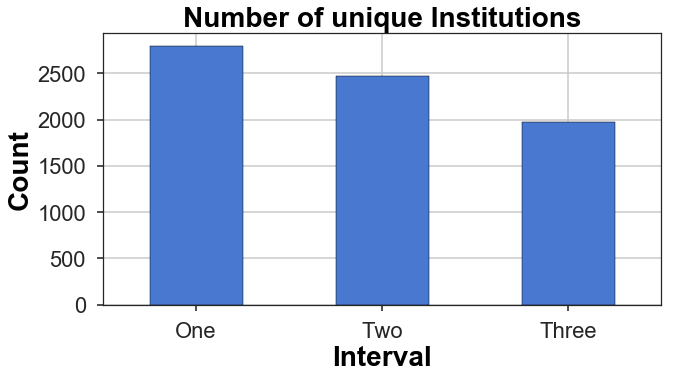

In [44]:
uniq_inst_series.plot.bar(figsize=(10,5))
plt.xticks(np.arange(3), ('One', 'Two', 'Three'), rotation=0)
plt.title("Number of unique Institutions")
plt.ylabel("Count")
plt.xlabel("Interval")

**In conclusion of the funding interval analysis...**

All these points of analysis are very interesting and give us a greater insight into a startup founders education. In particular, it was intriguing to see that the number of unique institutions attended decreases as the funding interval increases. This would be something that we could be investigated further in future work.

## Saving the adjusted dataframe in pickle file
- Updated uuid for University of Calgary.

In [45]:
founders_df_raw.to_pickle("../../data/analysis/300_analysis_RQ2.pkl")
founders_df_raw.shape

(44711, 55)